In [222]:
from itertools import cycle
from math import hypot
from numpy import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib


In [223]:
def dbscan_naive(P, eps, m, distance):
    NOISE = 0
    C = 0

    visited_points = set()
    clustered_points = set()
    clusters = {NOISE: []}

    def region_query(p):
        return [q for q in P if distance(p, q) < eps]

    def expand_cluster(p, neighbours):
        if C not in clusters:
            clusters[C] = []
        clusters[C].append(p)
        clustered_points.add(p)
        while neighbours:
            q = neighbours.pop()
            if q not in visited_points:
                visited_points.add(q)
                neighbourz = region_query(q)
                if len(neighbourz) > m:
                    neighbours.extend(neighbourz)
            if q not in clustered_points:
                clustered_points.add(q)
                clusters[C].append(q)
                if q in clusters[NOISE]:
                    clusters[NOISE].remove(q)

    for p in P:
        if p in visited_points:
            continue
        visited_points.add(p)
        neighbours = region_query(p)
        if len(neighbours) < m:
            clusters[NOISE].append(p)
        else:
            C += 1
            expand_cluster(p, neighbours)

    return clusters

In [241]:
import math 

def findMin(sse):
    d = 0
    for i in range(2,len(sse)-1):
        d += math.fabs((sse[i]-sse[i+1]))/math.fabs(sse[i-1]-sse[i])
    return round(d)

def findEps(sse):
    d = 0
    for i in range(2,len(sse)-55):
        d += math.fabs((sse[i]-sse[i+1]))/math.fabs(sse[i-1]-sse[i+55])
    return round(d)

In [224]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]


In [225]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
P=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])


C:\Users\djsbu\AppData\Local\Temp\ipykernel_10992\528992324.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(PointsInCircum(300,700))
C:\Users\djsbu\AppData\Local\Temp\ipykernel_10992\528992324.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(PointsInCircum(100,300))
C:\Users\djsbu\AppData\Local\Temp\ipykernel_10992\528992324.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  P=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])


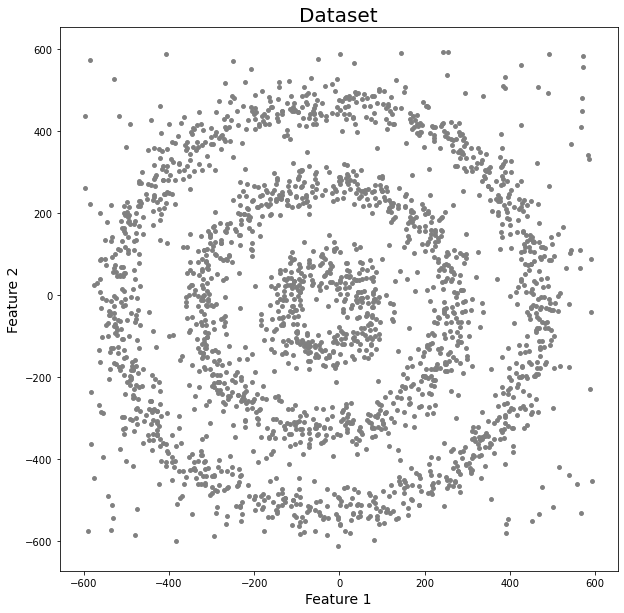

In [226]:
plt.figure(figsize=(10,10))
plt.scatter(P[0],P[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [228]:

P = [tuple(x) for x in P.to_numpy()]



In [229]:
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(P)
    sse.append(km.inertia_)
    

In [230]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(P)
distances, indices = nbrs.kneighbors(P)

In [231]:
table = {}
for i in range(len(distances)):
    table[i] = distances[i]


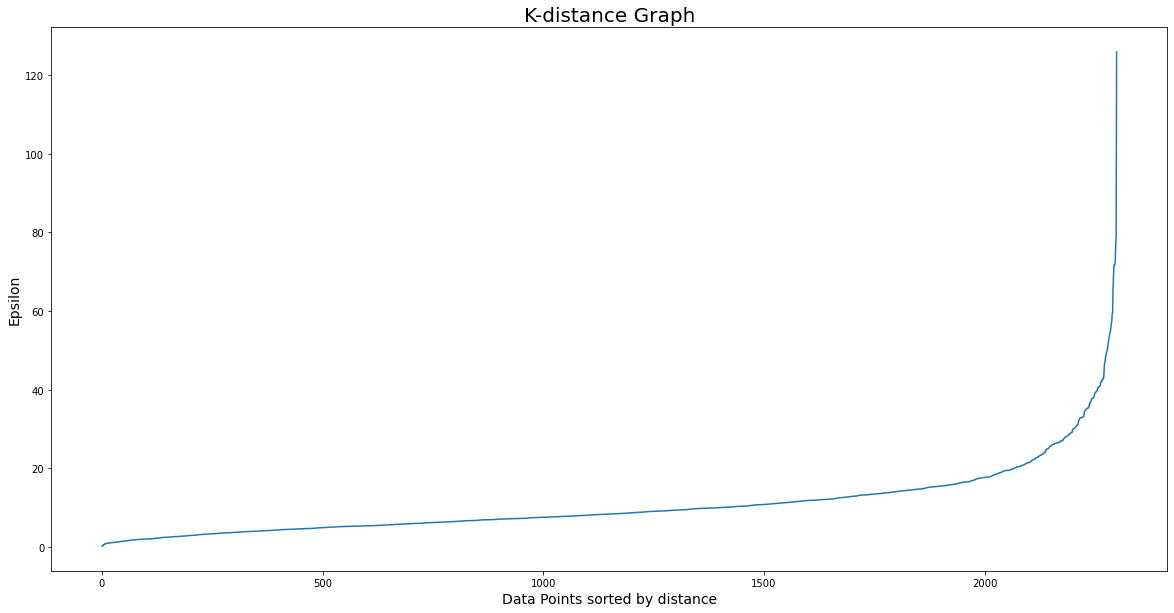

In [232]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [242]:



m = findMin(sse)
eps = findEps(distances)


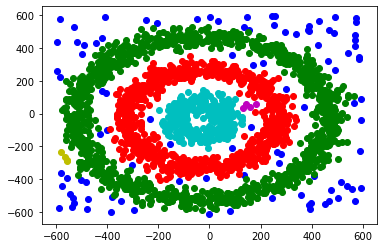

In [243]:
clusters = dbscan_naive(P, eps, m, lambda x, y: hypot(x[0] - y[0], x[1] - y[1]))
for c, points in zip(cycle('bgrcmykgrcmykgrcmykgrcmykgrcmykgrcmyk'), clusters.values()):
    X = [p[0] for p in points]
    Y = [p[1] for p in points]
    plt.scatter(X, Y, c=c)
plt.show()